In [58]:
import pandas as pd                               
import math as m
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor                     
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error          
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/150.0 MB 5.0 MB/s eta 0:00:31
   ---------------------------------------- 0.5/150.0 MB 5.1 MB/s eta 0:00:30
   ---------------------------------------- 0.8/150.0 MB 6.1 MB/s eta 0:00:25
   ---------------------------------------- 1.0/150.0 MB 6.0 MB/s eta 0:00:25
   ---------------------------------------- 1.3/150.0 MB 6.3 MB/s eta 0:00:24
   ---------------------------------------- 1.3/150.0 MB 6.3 MB/s eta 0:00:24
   ---------------------------------------- 1.3/150.0 MB 6.3 MB/s eta 0:00:24
   ---------------------------------------- 1.8/150.0 MB 5.5 MB/s eta 0:00:28
    --------------------------------------- 2.1/150.0 MB 5.7 MB/s eta 0:00:27
    ------------------

In [59]:
df = pd.read_csv(r"C:\Users\prern\Downloads\Salary_Data_(salary-prediction-project).csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [61]:
values = df['Job Title'].value_counts().nlargest(15).values
index = df['Job Title'].value_counts().nlargest(15).index

In [62]:
print(values)

[12 11 10  9  9  8  7  7  7  7  7  6  6  6  5]


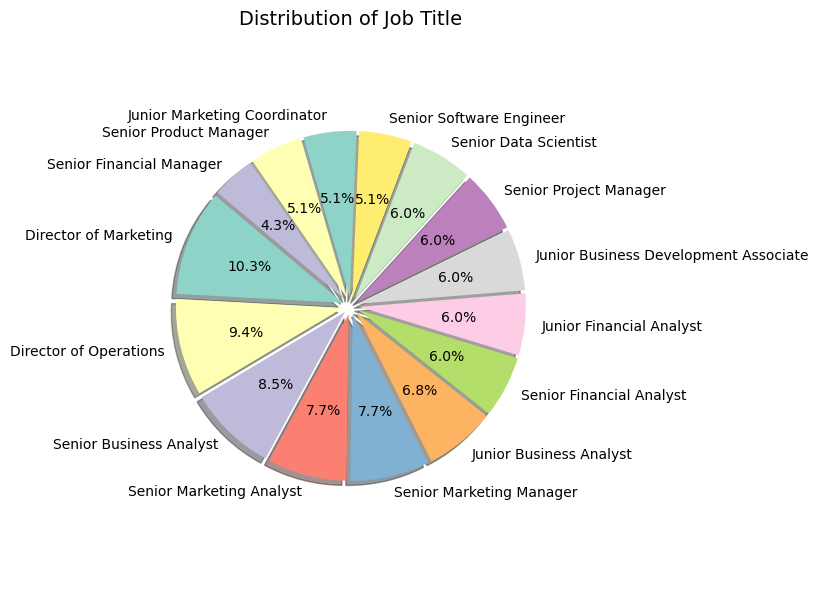

In [63]:

colors = sns.color_palette('Set3')       
explode = [0.05] * len(values)           

plt.figure(figsize=(8,6))
plt.title('Distribution of Job Title', fontsize=14)
plt.pie(values, labels=index, autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True,
        startangle=140, textprops={'fontsize': 10})

plt.axis('equal')  
plt.tight_layout()
plt.show()


In [64]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [65]:
df.duplicated().sum()


50

In [66]:
df.drop_duplicates(inplace = True)

In [67]:
object_data = df.select_dtypes(include = 'object')
for column in object_data.columns:
    print('column ',df[column].mode()[0])
    df[column].fillna(df[column].mode()[0],inplace = True)

column  Male
column  Bachelor's
column  Director of Operations


In [68]:
numeric_data = df.select_dtypes(exclude = 'object')
for column in numeric_data.columns:
    print(column,df[column].mean(),df[column].median())
    df[column] = df[column].fillna(df[column].median())

Age 37.382716049382715 36.5
Years of Experience 10.058641975308642 9.0
Salary 99985.64814814815 95000.0


In [13]:
for column in object_data.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(le.classes_)

['Female' 'Male']
["Bachelor's" "Master's" 'PhD']
['Account Manager' 'Accountant' 'Administrative Assistant'
 'Business Analyst' 'Business Development Manager'
 'Business Intelligence Analyst' 'CEO' 'Chief Data Officer'
 'Chief Technology Officer' 'Content Marketing Manager' 'Copywriter'
 'Creative Director' 'Customer Service Manager' 'Customer Service Rep'
 'Customer Service Representative' 'Customer Success Manager'
 'Customer Success Rep' 'Data Analyst' 'Data Entry Clerk' 'Data Scientist'
 'Digital Content Producer' 'Digital Marketing Manager' 'Director'
 'Director of Business Development' 'Director of Engineering'
 'Director of Finance' 'Director of HR' 'Director of Human Capital'
 'Director of Human Resources' 'Director of Marketing'
 'Director of Operations' 'Director of Product Management'
 'Director of Sales' 'Director of Sales and Marketing' 'Event Coordinator'
 'Financial Advisor' 'Financial Analyst' 'Financial Manager'
 'Graphic Designer' 'HR Generalist' 'HR Manager' 'Help D

In [69]:
df.corr()

C:\Users\prern\AppData\Local\Temp\ipykernel_16056\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.979191,0.916545
Years of Experience,0.979191,1.000000,0.924454
Salary,0.916545,0.924454,1.000000


C:\Users\prern\AppData\Local\Temp\ipykernel_16056\2855744796.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


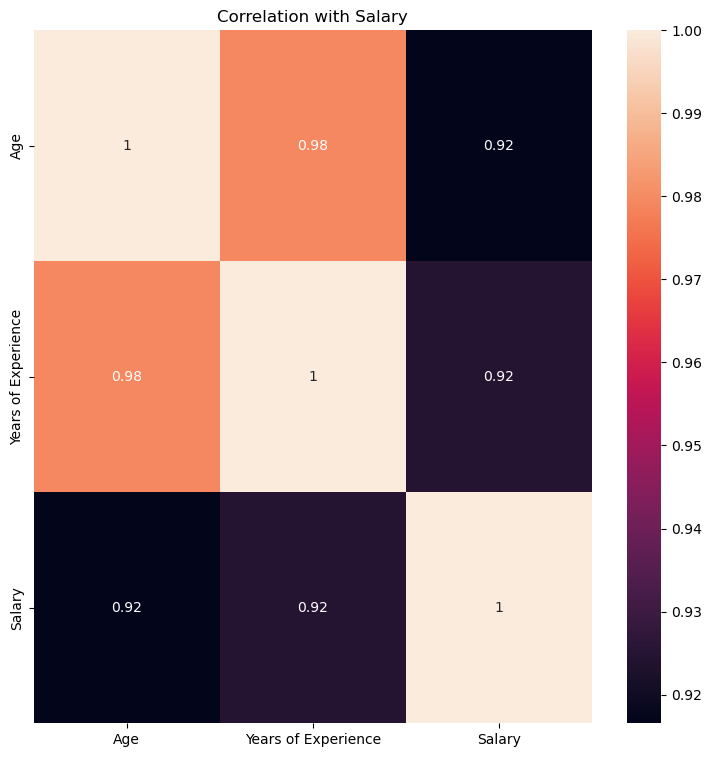

In [70]:
plt.figure(figsize=(9,9))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title("Correlation with Salary")
plt.show()

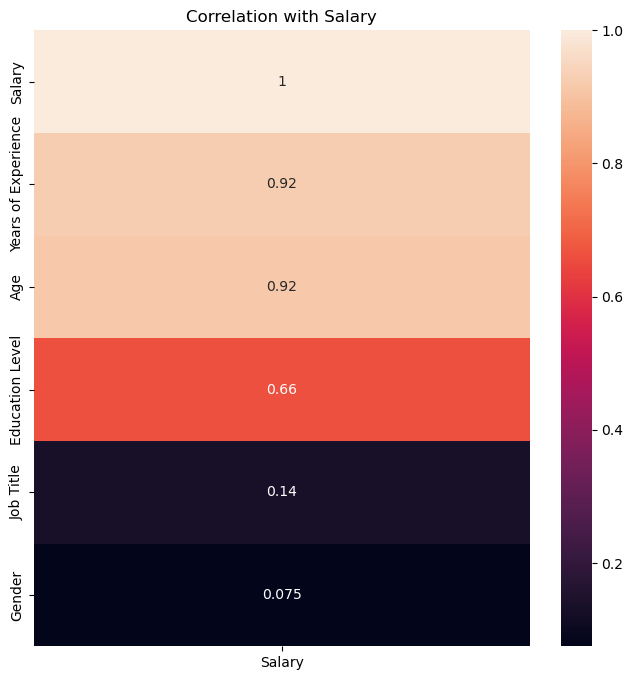

In [16]:
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation[['Salary']].sort_values(by='Salary', ascending=False), annot=True)
plt.title("Correlation with Salary")
plt.show()

# Split Data

In [17]:
x =df.drop('Salary',axis = 1)
y = df['Salary']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience
172,36.5,1,0,30,9.0
183,27.0,1,0,69,2.0
17,39.0,1,2,116,12.0
24,41.0,1,1,37,13.0
132,40.0,0,1,154,12.0
...,...,...,...,...,...
188,50.0,0,2,33,22.0
71,39.0,0,0,98,11.0
106,30.0,0,0,20,3.0
283,29.0,0,0,50,1.5


In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
model = LinearRegression()

In [71]:
model.fit(x_train,y_train) 

LinearRegression()

In [72]:
# Test model
y_predict = model.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 

R2 Score =  93.48%
Mean Absolute Error =  9301.646444075779
Mean Squared Error =  148883434.17611042
Root Mean Squared Error =  12201.779959338326


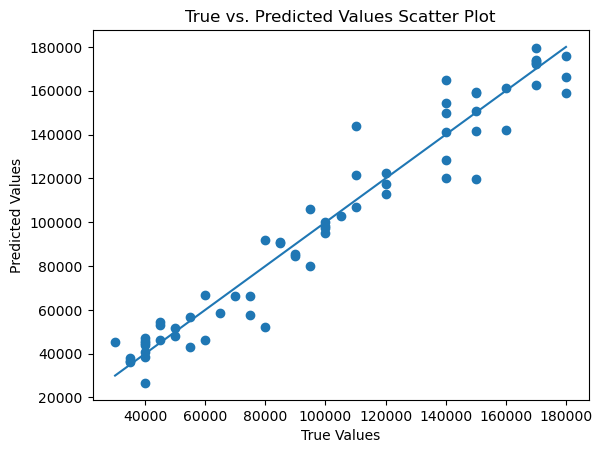

In [78]:
 
# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], label= 'Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()

In [23]:
model_2 =  XGBRegressor()

In [74]:
model_2.fit(x_train,y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [75]:
# Test model
y_predict = model_2.predict(x_test)
#Evaluate Model
print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
 

R2 Score =  94.58%
Mean Absolute Error =  8255.630408653846
Mean Squared Error =  123815484.41507193
Root Mean Squared Error =  11127.24064694711


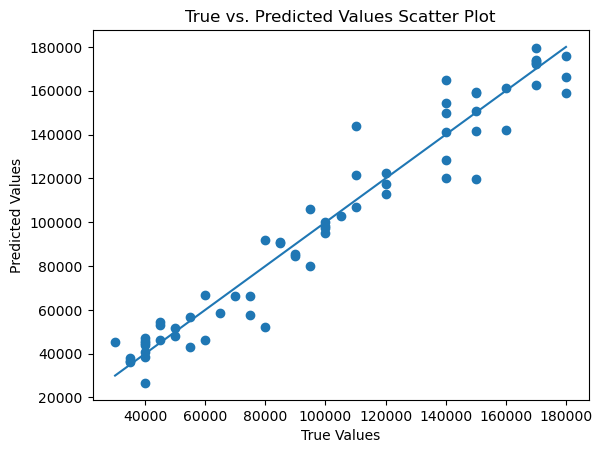

In [77]:

# Scatter plot for real and predict data
plt.scatter(y_test,y_predict)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], label= 'Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a title to the plot
plt.title("True vs. Predicted Values Scatter Plot")

# Display the plot
plt.show()


In [46]:

# Ask user to input values
age = int(input("Enter Age: "))
gender = input("Enter Gender (Male/Female): ")
edu = input("Enter Education Level (Bachelor's/Master's/PhD): ")
job = input("Enter Job Title: ")
exp = float(input("Enter Years of Experience: "))

# Convert to DataFrame
user_df = pd.DataFrame([{
    'Age': age,
    'Gender': gender,
    'Education Level': edu,
    'Job Title': job,
    'Years of Experience': exp
}])

# Encode using same label encoders as before
# Refit encoders using full dataset (needed here before prediction)
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
le_gender.fit(df['Gender'])

le_edu = LabelEncoder()
le_edu.fit(df['Education Level'])

le_job = LabelEncoder()
le_job.fit(df['Job Title'])

user_df['Gender'] = le_gender.transform(user_df['Gender'])
user_df['Education Level'] = le_edu.transform(user_df['Education Level'])
user_df['Job Title'] = le_job.transform(user_df['Job Title'])

# Scale the input using fitted scaler
user_scaled = scaler.transform(user_df)

# Predict using the trained XGBoost model
predicted_salary = model_2.predict(user_scaled)

# Show result
print(f"\n🎯 Predicted Monthly Salary: ₹{predicted_salary[0]:,.2f}")


Enter Age: 23
Enter Gender (Male/Female): Female
Enter Education Level (Bachelor's/Master's/PhD): Master's
Enter Job Title: Data Analyst
Enter Years of Experience: 2

🎯 Predicted Monthly Salary: ₹51,961.46


In [41]:
import joblib

# Save XGBoost model and StandardScaler
joblib.dump(model_2, 'xgb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [43]:
import os
print(os.getcwd())

C:\Users\prern


In [44]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [45]:
print(os.getcwd())

C:\Users\prern
